In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
Rather than the the data being a str ('yes' or 'no') I switched it to a binary for the ML models to be able to interpret
- 0 = No
- 1 = Yes

In [2]:
housing = pd.read_csv('data/housing_eda.csv')
housing

,price (in millions),area (in thousands sqft),bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,rooms,area (per room)
0,13.30000,7.42,4,2,3,yes,no,0,no,yes,2,yes,furnished,6,1236.666667
1,12.25000,8.96,4,4,4,yes,no,0,no,yes,3,no,furnished,8,1120.000000
2,12.25000,9.96,3,2,2,yes,no,1,no,no,2,yes,semi-furnished,6,1660.000000
3,12.21500,7.50,4,2,2,yes,no,1,no,yes,3,yes,furnished,7,1071.428571
4,11.41000,7.42,4,1,2,yes,yes,1,no,yes,2,no,furnished,6,1236.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.82000,3.00,2,1,1,yes,no,1,no,no,2,no,unfurnished,4,750.000000
541,1.76715,2.40,3,1,1,no,no,0,no,no,0,no,semi-furnished,4,600.000000
542,1.75000,3.62,2,1,1,yes,no,0,no,no,0,no,unfurnished,3,1206.666667
543,1.75000,2.91,3,1,1,no,no,0,no,no,0,no,furnished,4,727.500000


In [4]:
housing2 = housing

In [5]:
binary_cols = [
    'mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'prefarea'
    ]

housing2[binary_cols] = housing2[binary_cols].replace({'yes':1, 'no':0})

The 'furnishingstatus' columns also contains strings that need to be redefined.

In [ ]:
housing2['furnishingstatus'].unique()

The 'furnishingstatus' has three unique values
- furnished
- semi-furnished
- unfurnished

What I will do is create a column for every 'furnished' that has a binary value. Following same precedent.
- 0 = No
- 1 = Yes

In [6]:
housing3 = housing2

In [8]:
housing3['furnished'] = (housing3['furnishingstatus'] == 'furnished').astype(int)
housing3['furnished'] = (housing3['furnishingstatus'] == 'semi-furnished').astype(int)
housing3['furnished'] = (housing3['furnishingstatus'] == 'unfurnished').astype(int)
housing4 = housing3.drop('furnishingstatus', axis=1)

In [11]:
housing4

,price (in millions),area (in thousands sqft),bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,rooms,area (per room),furnished
0,13.30000,7.42,4,2,3,1,0,0,0,1,2,1,6,1236.666667,0
1,12.25000,8.96,4,4,4,1,0,0,0,1,3,0,8,1120.000000,0
2,12.25000,9.96,3,2,2,1,0,1,0,0,2,1,6,1660.000000,0
3,12.21500,7.50,4,2,2,1,0,1,0,1,3,1,7,1071.428571,0
4,11.41000,7.42,4,1,2,1,1,1,0,1,2,0,6,1236.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.82000,3.00,2,1,1,1,0,1,0,0,2,0,4,750.000000,1
541,1.76715,2.40,3,1,1,0,0,0,0,0,0,0,4,600.000000,0
542,1.75000,3.62,2,1,1,1,0,0,0,0,0,0,3,1206.666667,1
543,1.75000,2.91,3,1,1,0,0,0,0,0,0,0,4,727.500000,0


In [12]:
housing4['luxuries'] = housing4['stories'] + housing4['guestroom'] + housing4['basement'] + housing4['hotwaterheating'] + housing4['airconditioning'] + housing4['parking']
housing4.head(5)

,price (in millions),area (in thousands sqft),bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,rooms,area (per room),furnished,luxuries
0,13.300,7.42,4,2,3,1,0,0,0,1,2,1,6,1236.666667,0,6
1,12.250,8.96,4,4,4,1,0,0,0,1,3,0,8,1120.000000,0,8
2,12.250,9.96,3,2,2,1,0,1,0,0,2,1,6,1660.000000,0,5
3,12.215,7.50,4,2,2,1,0,1,0,1,3,1,7,1071.428571,0,7
4,11.410,7.42,4,1,2,1,1,1,0,1,2,0,6,1236.666667,0,7


<AxesSubplot: xlabel='price (in millions)', ylabel='area (in thousands sqft)'>

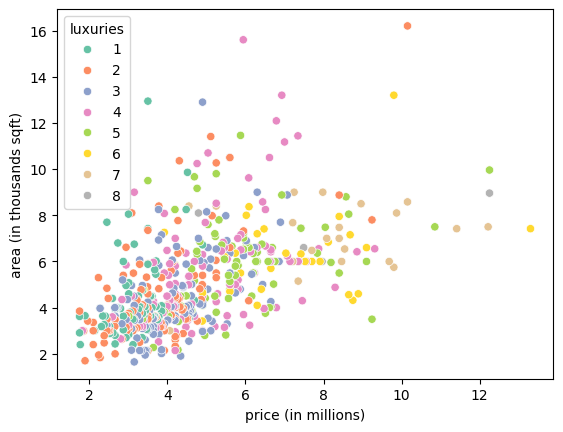

In [14]:
sns.scatterplot(housing4, 
                x='price (in millions)',
                y='area (in thousands sqft)',
                hue='luxuries',
                palette='Set2'
                )

In [15]:
housing4.to_csv('housing_cleaned.csv', index=False)